# Tutorial Ciencias de Datos 2025
## Boosting

**Objetivo:** 
Que se familiaricen con los ensambles en la teoría y en la práctica con scikitlearn

### Temario:
Repaso de Ensamble
Tipo de Boosting:
- AdaBoost
- GradientBoosting
- XGBoosting


### Motivación
Vimos el método de Árboles para clasificación o regresión, que se basaba en partir el espacio de atributos en 'rectángulos' o regiones.

Si bien este método tenía algunas ventajas como que es fácil de ilustrar y explicar, suele tener menos capacidad predictiva que otros métodos y suele ser poco robusto.

Entonces...

### ¿Qué son los métodos de Ensamble?
Son métodos que tienen como objetivo mejorar el rendimiento predictivo de un modelo dado. El principio general de los métodos de ensamble es construir una combinación lineal de otros modelos, en lugar de utilizar un único modelo que por si solo tenga bajo poder predictivo (a estos se le llama *weak learners*). Por ejemplo, hay ensambles que combinan varios árboles de decisión para producir una mejor predicción que un solo árbol de decisión. El ensemble ayuda a reducir la varianza y/o el sesgo.

### [Ensambles](https://scikit-learn.org/stable/modules/ensemble.html) 
El objetivo de los algoritmos de *ensemble* es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje dado para mejorar la generalización / robustez sobre un solo estimador.

#### Hay dos familias de métodos de ensamble que generalmente se distinguen:

**Métodos de promedio:** el principio impulsor es construir varios estimadores de forma independiente y luego promediar sus predicciones. En promedio, el estimador combinado suele ser mejor que cualquiera de los estimadores de base única porque su varianza es menor y ayuda a evitar el sobreajuste. **Ejemplos:** *Bootstrap Aggregation (Bagging)*, *Random Forest*.

**Métodos de Boosting:** los estimadores base se construyen secuencialmente y se intenta reducir el sesgo del estimador combinado. Esto puede causar sobreajuste. Para evitarlo, el ajuste de parámetros juega un papel importante en la mejora de estos algoritmos. La motivación es combinar varios modelos débiles para producir un modelo más robusto. 
**Ejemplos:** *AdaBoost*, *Gradient Tree Boosting*, *GBM*, *XGBM*.

#### Ventajas del ensamble
- Los ensambles mejoran la precisión del modelo y funcionan en la mayoría de los casos.
- Los ensambles hacen que el modelo sea más robusto y estable, lo que garantiza un rendimiento decente en los casos de prueba en la mayoría de los escenarios.
- Los ensambles se pueden utilizar para capturar relaciones lineales, simples y complejas, así como no lineales en los datos. Esto se puede hacer usando dos modelos diferentes y formando un ensamble con ellos.

#### Desventajas del ensamble
- Los ensambles reducen la interpretabilidad del modelo y hacen que sea difícil comunicar los resultados.
- Llevan más tiempo y, por lo tanto, podría no ser la mejor idea para aplicaciones en tiempo real.
- La selección de modelos para crear un ensamble es un arte realmente difícil de dominar.

#### Técnicas básicas de ensambles
- *Majority Vote*: es una de las formas más simples de combinar predicciones de múltiples algoritmos de aprendizaje automático. Cada modelo base hace una predicción y vota para cada muestra. Para cada una de las observaciones, la clase con más votos se considera la clase predictiva final. Se utiliza principalmente para problemas de clasificación.
- *Promedio*: el promedio generalmente se usa para problemas de regresión (pero se puede utilizar al estimar las probabilidades en las tareas de clasificación). Las predicciones se extraen de varios modelos y se utiliza un promedio de las predicciones para hacer la predicción final.
- *Promedio ponderado*: al igual que el promedio, el promedio ponderado también se usa para tareas de regresión. Alternativamente, se puede utilizar al estimar probabilidades en problemas de clasificación. A los modelos de base se les asignan diferentes ponderaciones, que representan la importancia de cada modelo en la predicción.


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from ISLP import load_data
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor 


### Continuamos con la base de Boston para predecir precio de casas 

En este ejemplo vamos a usar la base de datos de [Boston](https://islp.readthedocs.io/en/latest/datasets/Boston.html) con datos de casas.

**Variables in database:**
- CRIM:     per capita crime rate by town
- ZN:    proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:   proportion of non-retail business acres per town
- CHAS:  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per USD10,000
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    % lower status of the population
- MEDV:     Median value of owner-occupied homes in USD1000's

In [4]:
dataset = load_data('Boston')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
print(dataset.shape)
dataset.head() 

(506, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
dataset.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
zn,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
indus,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
chas,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
nox,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
rm,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
age,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
dis,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
rad,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
tax,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


#### Preparación de datos para entrenamiento

En primer lugar, dividiremos los datos en conjuntos de "atributos" (X) y "etiquetas" (y). El resultado luego se dividirá en conjuntos de entrenamiento y prueba.

En segundo lugar, notarán que los valores de la base de datos no están muy bien escalados. El campo TAX tiene valores en el rango de las centenas, mientras que RAD por ejemplo tiene valores en el rango de unidades. Será mejor si escalamos los datos. Usaremos la clase StandardScaler de Scikit-Learn para hacerlo.

In [8]:
X = dataset.iloc[:, 0:12]
y = dataset.iloc[:, 12].values
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### Base de comparación para la predicción de precios
Vamos a hacer una estimación de precios por MCO y CART como medidas de base de comparación de MSE test de modelo lineal y no lineal

##### Modelo lineal

In [14]:
lineal = LinearRegression().fit(X_train, Y_train)

In [16]:
# El intercepto
intercepto = lineal.intercept_
print('\nIntercepto:', intercepto.round(2))

# La pendiente
pendiente = lineal.coef_
print('\nPendiente:', pendiente.round(2))


Intercepto: 22.61

Pendiente: [-0.98  1.08  0.    0.65 -1.96  2.47  0.03 -2.92  1.92 -1.89 -2.25 -3.85]


In [18]:
# Estima y predicho
y_mco = lineal.predict(X_test)

# MSE test
mse0 = mean_squared_error(Y_test, y_mco)
print('\nMSE test (MCO):',mse0)


MSE test (MCO): 34.39506346464681


#### Modelo No lineal: CART podado

In [20]:
# Set simple de Ranfom Forest
tree_model = DecisionTreeRegressor(random_state=1) 

# Cagrilla de costo de penalidad
alpha_range = [0.0, 0.01, 0.1, 0.5, 0.75, 1.0]
tre_para = {'ccp_alpha':alpha_range}

# Estimacion para la grilla de parametro de tunning
grid_search = GridSearchCV(tree_model, tre_para, cv=5, scoring='neg_median_absolute_error')
grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeR...andom_state=1)
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...]}"
,scoring,'neg_median_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [22]:
# Extraemos el mejor modelo
best_tree = grid_search.best_estimator_
best_tree

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.1


In [24]:
# Hacemos predicciones para evaluar el modelo
y_cart = best_tree.predict(X_test)

mse_cart = mean_squared_error(Y_test, y_cart)

print(f"Mejores parámetros para el árbol de regresión: {grid_search.best_params_}")
print(f"MSE test (CART a=0.1): {mse_cart:.2f}")

Mejores parámetros para el árbol de regresión: {'ccp_alpha': 0.1}
MSE test (CART a=0.1): 29.58


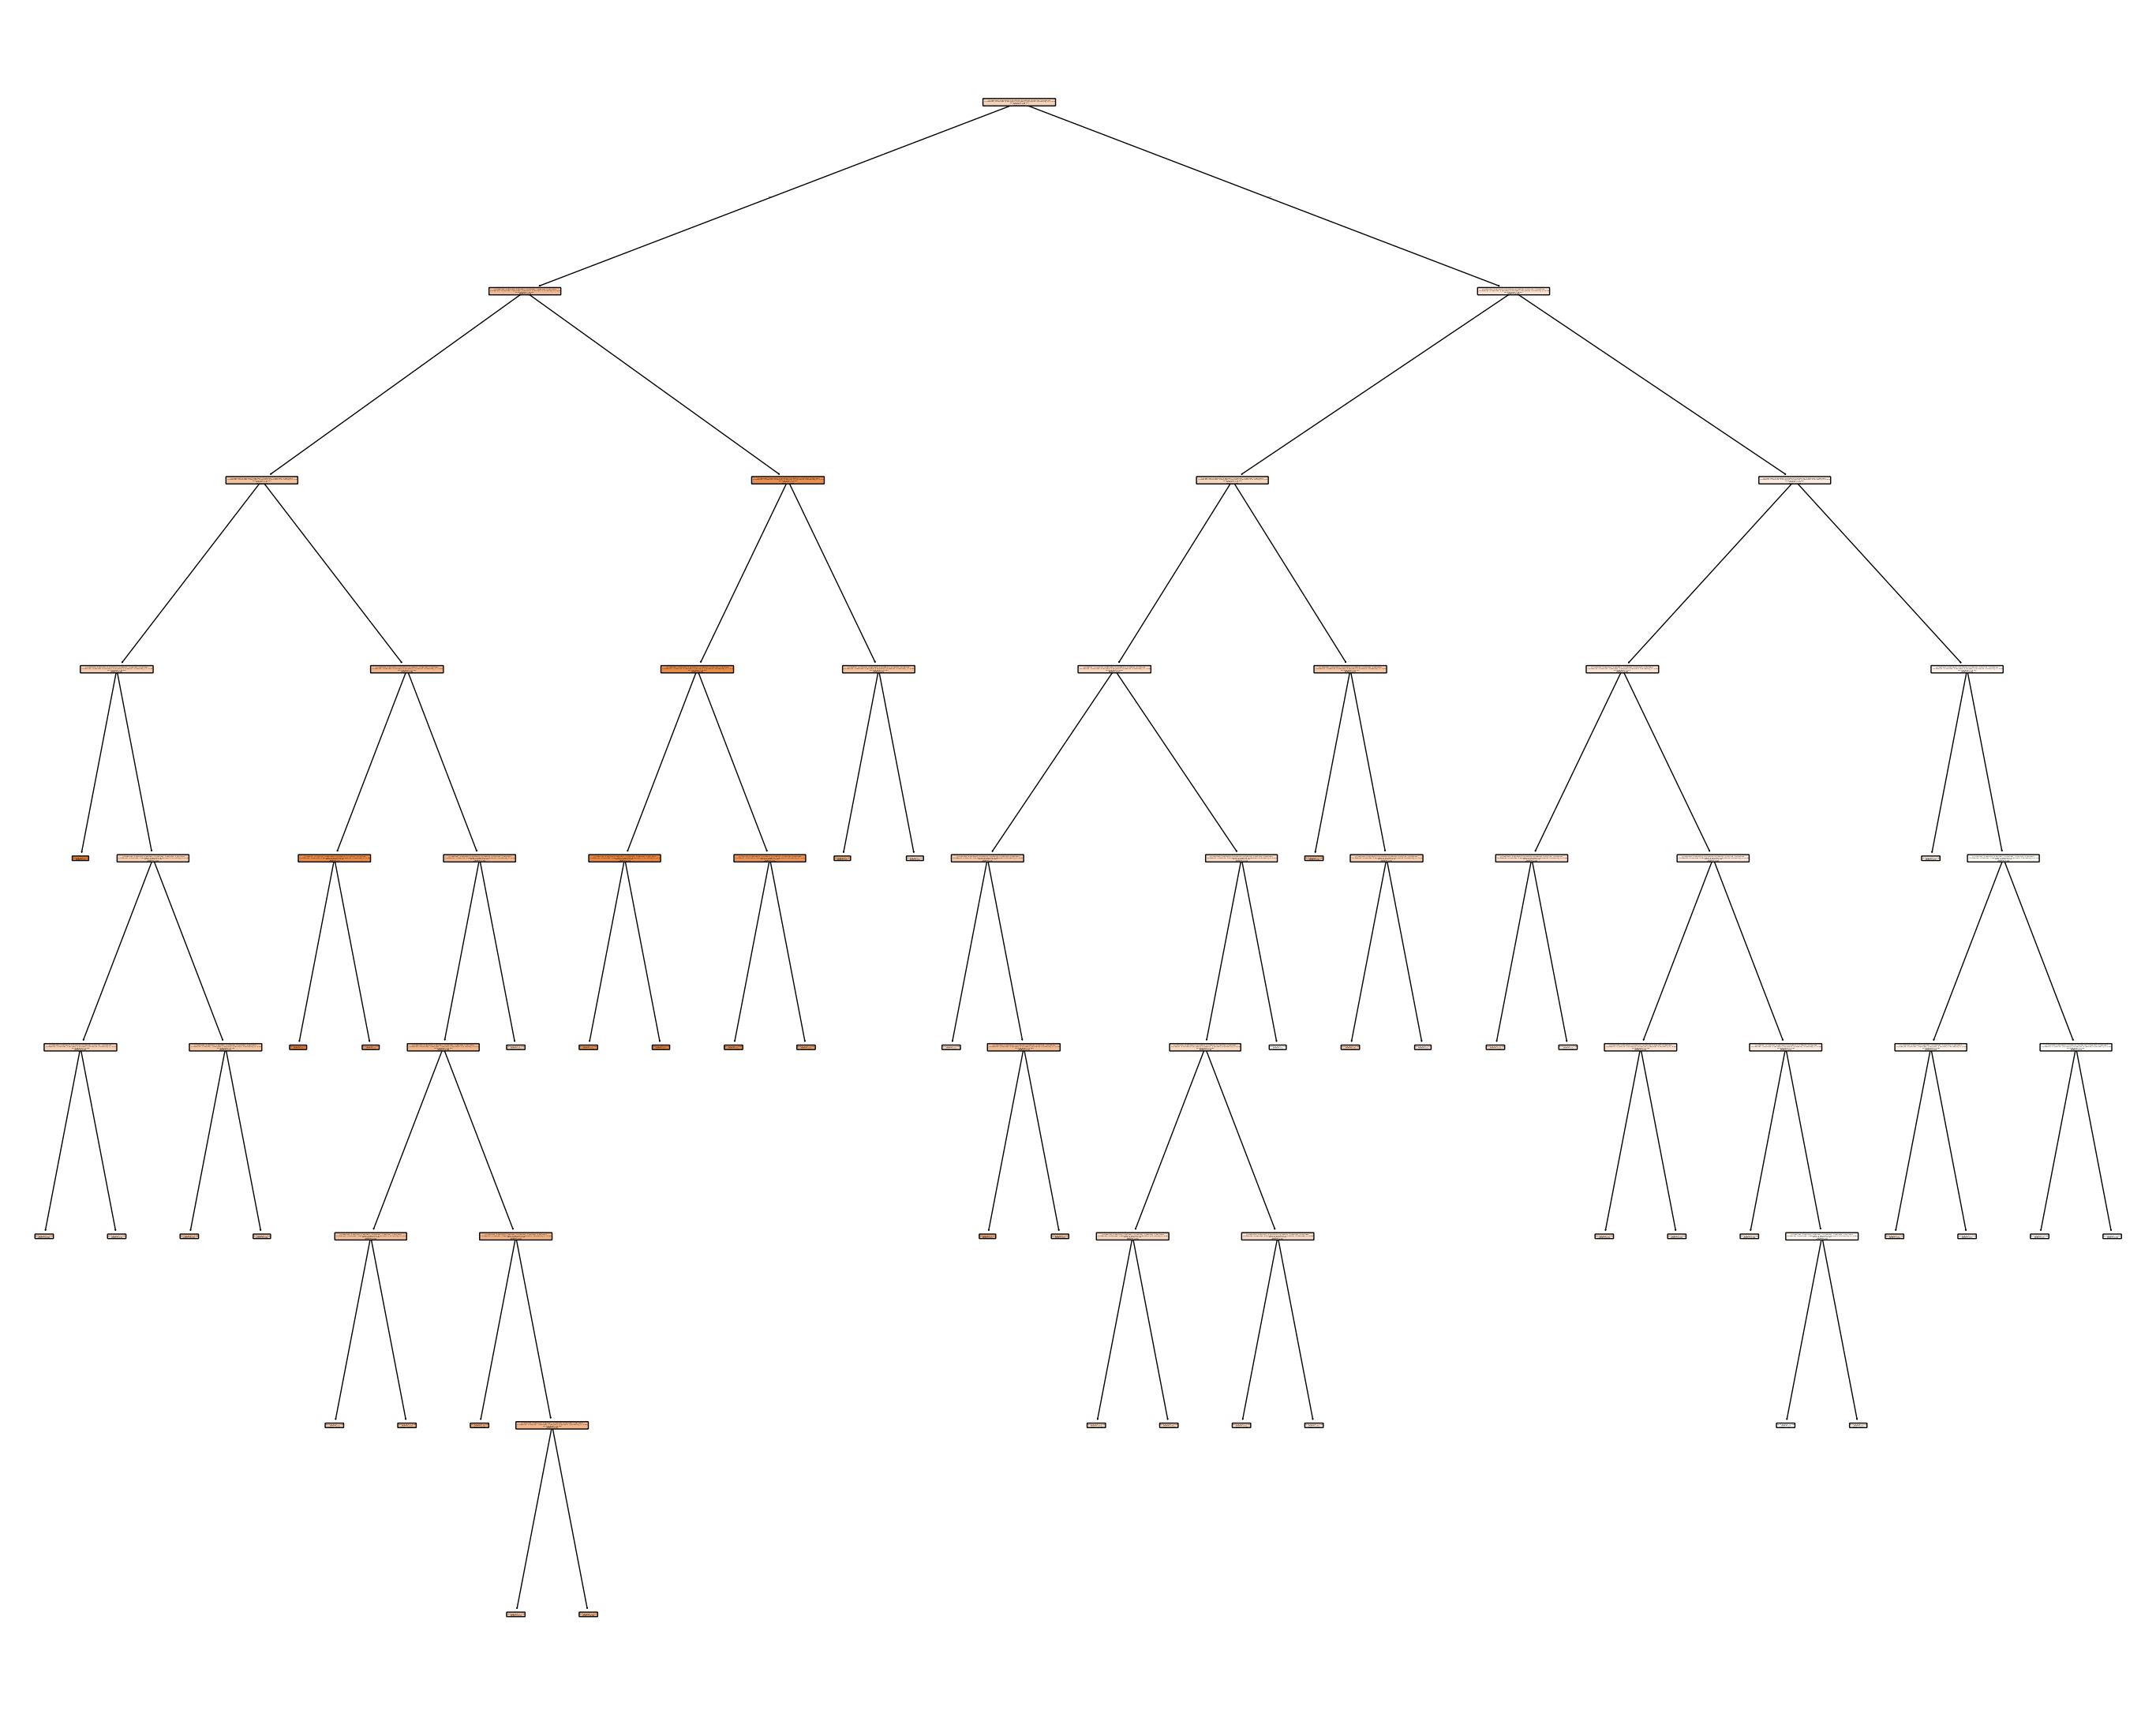

In [26]:
# Gráfico
fig = plt.figure(figsize=(35,28))
graph = plot_tree(best_tree,
                  feature_names = list(X_train),
                  rounded = True, 
                  filled = True   #colorear los nodos p/ indicar la clase mayoritaria (p/ clasif.)
                 )
fig.savefig("housing_cart.pdf",bbox_inches='tight')

##### Metodos de Ensamble 1: Bagging y Random Forest

In [28]:
# Set simple de Bagging
bagg_model = BaggingRegressor(max_samples=200, random_state=1) 
# Cantidad de muestras boostrapeadas (y por lo tanto arboles estimados que se promedian)
Bsamples = [1, 5, 10, 100, 200, 500]
bagg_para = {'n_estimators':Bsamples}

# Estimacion para la grilla de parametro de tunning
grid_search = GridSearchCV(bagg_model, bagg_para, cv=5, scoring='neg_median_absolute_error')
grid_search.fit(X_train, Y_train)

,estimator,BaggingRegres...andom_state=1)
,param_grid,"{'n_estimators': [1, 5, ...]}"
,scoring,'neg_median_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [30]:
# Extraemos el mejor modelo
best_bagg = grid_search.best_estimator_
y_pred_bagg = best_bagg.predict(X_test)
best_bagg

# Evaluamos el modelo
mse_bagg = mean_squared_error(Y_test, y_pred_bagg)


In [32]:
# Set simple de Random Forest
rf_model = RandomForestRegressor( random_state=1) 

# Definimos un rango de valores para los hiperparámetros
param_grid = {
    'n_estimators': [1, 5, 10, 100, 200, 500],
    'max_features': [2, 10, 20],
}


# Estimacion para la grilla de parametro de tunning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_median_absolute_error')
grid_search.fit(X_train, Y_train)

,estimator,RandomForestR...andom_state=1)
,param_grid,"{'max_features': [2, 10, ...], 'n_estimators': [1, 5, ...]}"
,scoring,'neg_median_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [34]:
# Extraemos el mejor modelo
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
best_rf

# Evaluamos el modelo
mse_rf = mean_squared_error(Y_test, y_pred_rf)

#### Comparamos rapidamente todos los modelos

In [36]:
print('MSE test MCO:', mse0) 
print('MSE test CART:', mse_cart) 
print('MSE test Bagging:', mse_bagg) 
print('MSE test Random Forest:', mse_rf) 

MSE test MCO: 34.39506346464681
MSE test CART: 29.579355626698074
MSE test Bagging: 22.564375600490184
MSE test Random Forest: 21.88468028431374


## 1. AdaBoost
Un regresor AdaBoost es un metaestimador que comienza ajustando un regresor en el conjunto de datos original y luego ajusta copias adicionales del regresor en el mismo conjunto de datos, pero donde los pesos de las instancias se ajustan según el error de la predicción actual. Como tal, los regresores posteriores se enfocan más en casos difíciles.

Para utilizar AdaBoost Regressor con Scikit-Learn tenemos [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html?highlight=adaboost#sklearn.ensemble.AdaBoostRegressor) y [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier). En este caso usaremos AdaBoostRegressor dado que queremos predecir el valor de las viviendas

### Función de pérdida de AdaBoost

AdaBoost se basa en la **exponential loss**, que puede escribirse de forma simple como:


$$L(y, F(x)) = e^{-yF(x)}$$


donde  
- $(y \in \{-1, +1\})$  
- $(F(x))$ es la predicción agregada del modelo.

Esta pérdida penaliza de manera exponencial los errores, haciendo que AdaBoost se enfoque en las observaciones difíciles.


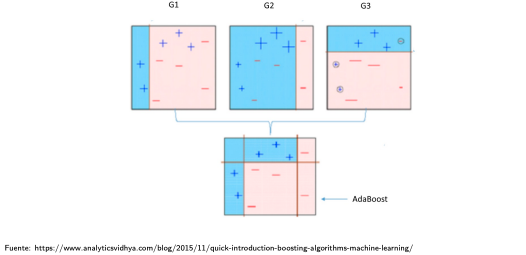

In [38]:
regressor = AdaBoostRegressor(random_state=1)
# estimator=None    DecisionTreeRegressor initialized with max_depth=3.
regressor.fit(X_train, Y_train) 
y_ada = regressor.predict(X_test)
mse_test_adaBoo = mean_squared_error(Y_test, y_ada)
print('MSE testeo (AdaBoost default):', mse_test_adaBoo)

MSE testeo (AdaBoost default): 25.859696574835052


#### Ajustando el parametro de penalidad $\lambda$

In [40]:
regressor = AdaBoostRegressor(learning_rate=0.001, random_state=1)
# learning_rate penalizacion de ajuste (lambda en las slides). Default es 1
regressor.fit(X_train, Y_train) 
y_ada1 = regressor.predict(X_test)
mse_test_adaBoo1 = mean_squared_error(Y_test, y_ada1)

In [42]:
regressor = AdaBoostRegressor(learning_rate=0.01, random_state=1)
regressor.fit(X_train, Y_train) 
y_ada2 = regressor.predict(X_test)
mse_test_adaBoo2 = mean_squared_error(Y_test, y_ada2)

In [44]:
regressor = AdaBoostRegressor(learning_rate=5, random_state=1)
regressor.fit(X_train, Y_train) 
y_ada3 = regressor.predict(X_test)
mse_test_adaBoo3 = mean_squared_error(Y_test, y_ada3)

In [46]:
print('MSE test de:', 
      '\n lambda=1 (default) :', mse_test_adaBoo,
      '\n lambda=0.001 :', mse_test_adaBoo1, 
      '\n lambda=0.01 :', mse_test_adaBoo2,
      '\n lambda=5 :', mse_test_adaBoo3)

MSE test de: 
 lambda=1 (default) : 25.859696574835052 
 lambda=0.001 : 26.88407264243986 
 lambda=0.01 : 27.382863436514985 
 lambda=5 : 694.7847058823526


#### Usando cross-validation para elegir los hiperparámetros en AdaBoosting

In [48]:
params_grid_ab = {
    'n_estimators': [25, 50, 75, 100], # n_estimators=50 es el valor default de numero de árboles secuenciales (B en las slides)
    'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 5]   
}

adaB = AdaBoostRegressor(random_state=1)
grid_adb = GridSearchCV(estimator=adaB, param_grid=params_grid_ab, cv=5)
grid_adb.fit(X_train, Y_train)

,estimator,AdaBoostRegre...andom_state=1)
,param_grid,"{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [25, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [50]:
grid_adb.best_estimator_

,estimator,None
,n_estimators,100
,learning_rate,1.5
,loss,'linear'
,random_state,1


In [52]:
# Evaluamos el modelo en base de testeo
regressor = AdaBoostRegressor(n_estimators=100, learning_rate=1.5, random_state=1) 
regressor.fit(X_train, Y_train) 
y_pred_adb = regressor.predict(X_test)
mse_test_adb = mean_squared_error(Y_test, y_pred_adb)
print('MSE test (AdaBoost)', mse_test_adb)

MSE test (AdaBoost) 26.94785446719546


### Gradient Boosting for regression
GB construye un modelo aditivo de manera progresiva por etapas; es un método de aprendizaje lento donde los sucesivos modelos de árboles de decisión son entrenados para predecir los residuales del árbol antecesor permitiendo que los resultados de los modelos subsiguientes sean agregados y corrijan los errores promediando las predicciones.

Para determinar los parámetros que tendrán cada uno de los árboles de decisión agregados al modelo se utiliza un procedimiento descenso por gradiente que minimizará la función de pérdida. De esta forma se van agregando árboles con distintos parámetros de forma tal que la combinación de ellos minimiza la pérdida del modelo y mejora la predicción.

La diferencia con adaboost es que **ya no pesamos cada punto independientemente**, sino que proponemos una **función de error** cuyo gradiente tenemos que minimizar. El hiperparámetro de **Learning Rate ($\eta$)** es un escalar no negativo(aunque se recomienta que sea chiquito $\eta$ < 1) que multiplica los residuales para asegurar convergencia. A medida que se reduce el valor de $\eta$ es recomendable aumentar el número de estimadores N.
La predicción del modelo final estará luego conformada de la siguiente manera:

$y_{pred} = y_1 + \eta r_1 + ... +  \eta r_N$

Para utilizar Gradient Boosting Regressor con Scikit-Learn tenemos [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=randomforestregression) y [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradientboostingclassifier#sklearn.ensemble.GradientBoostingClassifier). En este caso usaremos GradientBoostingRegressor dado que queremos predecir el valor de las viviendas

### Función de pérdida en Gradient Boosting

En Gradient Boosting la función de pérdida no es única: depende del problema.  
El caso canónico en regresión es la **pérdida cuadrática (MSE)**, cuya forma elegante es:



$$L(y, F(x)) = \tfrac{1}{2}\,(y - F(x))^{2}$$


El modelo se construye iterativamente ajustando un árbol al **gradiente negativo** de esta pérdida, es decir, a los pseudo–residuos:


$$r_i= y_i - F(x_i)$$


Cada nuevo árbol aprende precisamente estos residuos, permitiendo que el modelo mejore de manera aditiva en la dirección del gradiente.


## 2. Gradient Boosting for regression 
GB construye un modelo aditivo de manera progresiva por etapas; permite la optimización de funciones de pérdida diferenciables arbitrarias. En cada etapa se ajusta un árbol de regresión sobre el gradiente negativo de la función de pérdida dada.

Para utilizar Gradient Boosting Regressor con Scikit-Learn tenemos [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=randomforestregression) y [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradientboostingclassifier#sklearn.ensemble.GradientBoostingClassifier). En este caso usaremos GradientBoostingRegressor dado que queremos predecir el valor de las viviendas


In [54]:
regressor = GradientBoostingRegressor(random_state=1, learning_rate=0.1, n_estimators=100) 
# learning_rate=0.1 es el default pero lo escribimos para visualizarlo
# n_estimators=100 arboles secuenciales por default
regressor.fit(X_train, Y_train) 
y_gb0 = regressor.predict(X_test)
mse_test_gb0 = mean_squared_error(Y_test, y_gb0)
print('MSE test (GradientBoosting default):', mse_test_gb0)

MSE test (GradientBoosting default): 18.021637059143934


#### Como predice con un arbol menos profundo que el deafult?
En AdaBoosting, cuando no se elige el tipo de estimador, se usa arbol de decision `DecisionTreeRegressor` con `max_depth=3`.
Aqui podemos modificar directamente la profundidad del arbol de decision en cada iteración.

In [56]:
# Hagamos un arbol menos profundo
regressor = GradientBoostingRegressor(max_depth=2, random_state=1) 
# max_depth=3 es el default de profundidad del arbol en cada iteracion
regressor.fit(X_train, Y_train) 
y_gb1 = regressor.predict(X_test)
mse_test_gb1 = mean_squared_error(Y_test, y_gb1)

In [58]:
# Como predice con un arbol más profundo que el deafult?
regressor = GradientBoostingRegressor(max_depth=4, random_state=1) 
regressor.fit(X_train, Y_train) 
y_gb2 = regressor.predict(X_test)
mse_test_gb2 = mean_squared_error(Y_test, y_gb2)

In [60]:
# Como predice con mayor penalidad de ajuste (learning_rate) que el deafult?
regressor = GradientBoostingRegressor(max_depth=4, learning_rate=0.5, random_state=1) 
# learning_rate=0.1 es la tasa de aprendizaje default
regressor.fit(X_train, Y_train) 
y_gb3 = regressor.predict(X_test)
mse_test_gb3 = mean_squared_error(Y_test, y_gb3)

In [62]:
print('MSE test de:', 
      '\n learning_rate=0.1 & max_depth=3 (default) :', mse_test_gb0,
      '\n learning_rate=0.1 & max_depth=2  :', mse_test_gb1, 
      '\n learning_rate=0.1 & max_depth=4 :', mse_test_gb2,
      '\n learning_rate=0.5 & max_depth=4 :', mse_test_gb3)

MSE test de: 
 learning_rate=0.1 & max_depth=3 (default) : 18.021637059143934 
 learning_rate=0.1 & max_depth=2  : 22.51453303549805 
 learning_rate=0.1 & max_depth=4 : 18.165899779127372 
 learning_rate=0.5 & max_depth=4 : 20.139756093263795


#### Usando cross-validation para elegir los hiperparámetros en GradientBoosting

In [64]:
params_grid_gradb = {
    'n_estimators': [25, 50, 75, 100], # n_estimators=100 default de arboles secuenciales
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.75],
    'max_depth': [None, 1, 2, 3, 4, 5]
}

gradb = GradientBoostingRegressor(random_state=1)
grid_gradb = GridSearchCV(estimator=gradb, param_grid=params_grid_gradb, cv=5)
grid_gradb.fit(X_train, Y_train)

,estimator,GradientBoost...andom_state=1)
,param_grid,"{'learning_rate': [0.001, 0.01, ...], 'max_depth': [None, 1, ...], 'n_estimators': [25, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [85]:
grid_gradb.best_estimator_

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [66]:
params_gradb = grid_gradb.best_params_
params_gradb

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

En este caso, los *parametros de tunning por default* son los *mejores hiperparametros*!

In [68]:
y_pred_gradb = grid_gradb.best_estimator_.predict(X_test)
mse_test_best_gradb = mean_squared_error(Y_test, y_pred_gradb)
print('MSE de testeo (GradientBoosting)', mse_test_best_gradb)

MSE de testeo (GradientBoosting) 18.021637059143934


## 3. XGBoosting

`XGBoosting` tiene ventajas como: 
1.	Eficiencia computacional de XGBoosting con respecto a AdaBoosting o Gradient Boosting con bases grandes.
2.	Considera matrices con missing values

Pueden acceder al paper original en este [link](https://dl.acm.org/doi/pdf/10.1145/2939672.2939785). También, pueden encontrar la documentación [aquí](https://xgboost.readthedocs.io/en/latest/python/python_api.html) y una linda ilustración para Clasificación [aquí](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/)

### Función de pérdida en XGBoost

XGBoost utiliza una función objetivo que combina **pérdida** + **regularización del árbol**:

$$
\text{Obj} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) \;+\; \Omega(f_m)
$$

La regularización controla la complejidad del árbol:

$$
\Omega(f) = \gamma\,T \;+\; \frac{\lambda}{2}\sum_{j=1}^{T} w_j^{2}
$$

donde  
- $(T)$ = número de hojas,  
- $(w_j)$ = peso de cada hoja,  
- $(\gamma, \lambda)$ = hiperparámetros de regularización.

In [70]:
# Install Extreme Gradient Boosting 
#!pip install xgboost
import xgboost
print(xgboost.__version__) #checking latest version
from xgboost import XGBRegressor

3.1.2


In [72]:
# iniciemos con la configuración por default
regressor = XGBRegressor(random_state=1) 
regressor.fit(X_train, Y_train) 
y_xgb0 = regressor.predict(X_test)
mse_test_xgb0 = mean_squared_error(Y_test, y_xgb0)
print('MSE test (XGBoosting default):', mse_test_xgb0)

MSE test (XGBoosting default): 22.38621926729619


#### Probamos distintos parámetros

In [74]:
# Con mayor numero de arboles?
regressor = XGBRegressor(n_estimators=500,random_state=1) 
# n_estimators=100 es el defual
regressor.fit(X_train, Y_train) 
y_xgb1 = regressor.predict(X_test)
mse_test_xgb1 = mean_squared_error(Y_test, y_xgb1)


In [76]:
# Con mayor profundidad de arboles?
regressor = XGBRegressor(n_estimators=500,max_depth=10, random_state=1) 
# max_depth=6 es el defualt
regressor.fit(X_train, Y_train) 
y_xgb2 = regressor.predict(X_test)
mse_test_xgb2 = mean_squared_error(Y_test, y_xgb2)

In [78]:
# Con mayor tasa de aprendizaje?
regressor = XGBRegressor(n_estimators=500, max_depth=10, eta=0.5, random_state=1) 
# eta=0.3 es el defual
regressor.fit(X_train, Y_train) 
y_xgb3 = regressor.predict(X_test)
mse_test_xgb3 = mean_squared_error(Y_test, y_xgb3)

In [80]:
print('MSE test de:', 
      '\n XGBoost (default) :', mse_test_xgb0,
      '\n n_estimators=500 :', mse_test_xgb1, 
      '\n n_estimators=500 & max_depth=10:', mse_test_xgb2,
      '\n n_estimators=500, max_depth=10, eta=0.5 :', mse_test_xgb3)

MSE test de: 
 XGBoost (default) : 22.38621926729619 
 n_estimators=500 : 22.382918076437353 
 n_estimators=500 & max_depth=10: 20.24013978982433 
 n_estimators=500, max_depth=10, eta=0.5 : 19.344881082284715


#### Usando cross-validation para elegir los hiperparámetros en XGBoosting

In [82]:
params_grid_xgb = {
    'n_estimators': [25, 50, 75, 100, 500], # n_estimators=100 default de arboles secuenciales
    'eta': [0.01, 0.1, 0.5, 0.75],
    'max_depth': [None, 3, 6, 9]
}

xgb = XGBRegressor(random_state=1)
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_grid_xgb, cv=5)
grid_xgb.fit(X_train, Y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'eta': [0.01, 0.1, ...], 'max_depth': [None, 3, ...], 'n_estimators': [25, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [84]:
params_xgb = grid_xgb.best_params_
params_xgb

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [86]:
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)
mse_test_best_xgb = mean_squared_error(Y_test, y_pred_xgb)
print('MSE de testeo (GradientBoosting)', mse_test_best_xgb)

MSE de testeo (GradientBoosting) 21.26784061919566


##### Importancia de predictores
Al igual que hicimos para CART, Random Forest y Bagging. Aqui tambien podemos ver la importancia relativa de cada predictor en minimizar la RSS en el caso de regresión.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

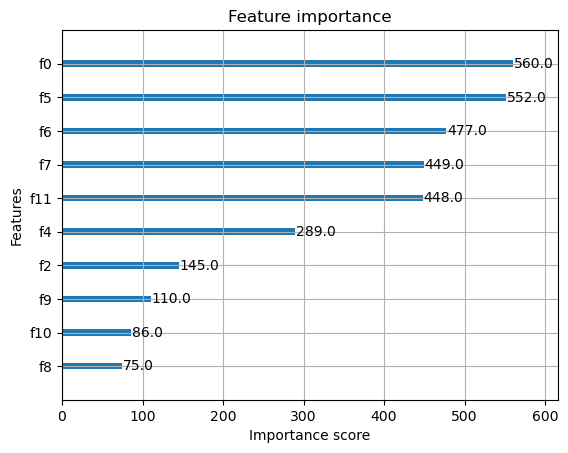

In [88]:
from xgboost import plot_importance
# Graficamos
plot_importance(grid_xgb.best_estimator_, max_num_features=10)

In [90]:
# Obtiene los índices de las características más importantes
importance_features = grid_xgb.best_estimator_.feature_importances_.argsort()[-10:][::-1]

# Nombres de las columnas originales
feature_names = np.array(X.columns)     # todas strings

# Selecciono las top
top_features = feature_names[importance_features]

print(top_features)

['lstat' 'ptratio' 'rm' 'tax' 'dis' 'nox' 'crim' 'indus' 'chas' 'rad']


In [119]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [127]:
X_train

array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.56165616,
        -0.48463784, -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ..., -0.57337637,
         0.33649132, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.60267689,
        -0.84958414, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ...,  0.17085685,
        -0.30216469, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.99530386,
        -0.25654641,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.6261173 ,
        -0.84958414,  0.27212814]])

### Comparamos el modelo lineal con los modelos de ensamble con mejores hiperparametros por CV

In [98]:

print('MSE test de:', 
      '\nMCO:',mse0,
      '\nCART',  mse_cart,
      '\nBagging', mse_bagg,
      '\nRF:', mse_rf, 
      '\nAdaBoost:', mse_test_adb, 
      '\nGradientBoosting:', mse_test_best_gradb,
      '\nXGBoosting:', mse_test_best_xgb)

MSE test de: 
MCO: 34.39506346464681 
CART 29.579355626698074 
Bagging 22.564375600490184 
RF: 21.88468028431374 
AdaBoost: 26.94785446719546 
GradientBoosting: 18.021637059143934 
XGBoosting: 21.26784061919566


## Conclusiones

Los métodos de ensamble superan claramente al modelo lineal (MCO) y al árbol CART. Bagging y Random Forest reducen el error de manera importante, siendo RF el mejor dentro de los métodos basados en promediar árboles.

Entre los métodos de boosting, AdaBoost funciona bien pero queda por detrás de Gradient Boosting y XGBoost. El mejor desempeño global lo obtiene **Gradient Boosting**, que logra el MSE más bajo.

En conjunto, los modelos gradiente (GB y XGB) y Random Forest son los que mejor capturan la complejidad del problema.

### ¿Por qué se observan estos resultados?

El rendimiento obtenido es consistente con lo esperable en un dataset relativamente pequeño. Gradient Boosting suele generalizar mejor que XGBoost cuando la muestra es limitada y el tuning no es muy profundo, porque produce modelos más estables y menos flexibles. XGBoost, en cambio, requiere una búsqueda más fina de hiperparámetros o un volumen mayor de datos para mostrar su ventaja. Random Forest también funciona muy bien porque reduce la varianza sin necesidad de ajustar muchos parámetros. AdaBoost, por su parte, es más sensible al ruido y por eso queda detrás de los otros métodos de boosting.